**Download the Dataset**

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Assignment-3/"

Flowers-Dataset.zip


In [3]:
!unzip -q "/content/drive/My Drive/Assignment-3/Flowers-Dataset.zip"

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import cv2
import numpy as np
import seaborn as sb 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [5]:
train_path = '/content/flowers/'
val_path = '/content/flowers/'


**Image Augmentation**

In [8]:
data = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split=0.25)

In [11]:
train_data = data.flow_from_directory('/content/flowers/', target_size=(224,224), class_mode = 'categorical', subset= 'training')


Found 3238 images belonging to 5 classes.


In [14]:
test_data = data.flow_from_directory('/content/flowers',target_size=(224,224),class_mode = 'categorical', subset = 'validation')


Found 1079 images belonging to 5 classes.


In [15]:
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**Create Model**

In [27]:
datamodel = Sequential()

**Add Layers**

In [28]:

datamodel.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
datamodel.add(MaxPooling2D(pool_size=(2,2)))
datamodel.add(Flatten())
datamodel.add(Dense(300,activation='relu'))
datamodel.add(Dense(150,activation='relu'))
datamodel.add(Dense(5,activation='softmax'))

**Compile The Model**

In [19]:
datamodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Fit The Model**

In [20]:
datamodel.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),epochs=15)

Epoch 1/15
102/102 [==============================] - 275s 3s/step - loss: 7.5656 - accuracy: 0.4166 - val_loss: 1.2590 - val_accuracy: 0.5199
Epoch 2/15
102/102 [==============================] - 267s 3s/step - loss: 1.1255 - accuracy: 0.5469 - val_loss: 1.1373 - val_accuracy: 0.5653
Epoch 3/15
102/102 [==============================] - 269s 3s/step - loss: 1.0337 - accuracy: 0.5985 - val_loss: 1.0682 - val_accuracy: 0.6033
Epoch 4/15
102/102 [==============================] - 262s 3s/step - loss: 0.9246 - accuracy: 0.6445 - val_loss: 1.0091 - val_accuracy: 0.6089
Epoch 5/15
102/102 [==============================] - 282s 3s/step - loss: 0.8749 - accuracy: 0.6683 - val_loss: 1.0787 - val_accuracy: 0.5987
Epoch 6/15
102/102 [==============================] - 265s 3s/step - loss: 0.8034 - accuracy: 0.7082 - val_loss: 1.0256 - val_accuracy: 0.6163
Epoch 7/15
102/102 [==============================] - 271s 3s/step - loss: 0.7703 - accuracy: 0.7106 - val_loss: 1.0172 - val_accuracy: 0.6293

**Save The Model**

In [21]:
datamodel.save('flowers.h5')


**Test The Model**

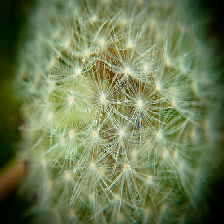

In [23]:
img = image.load_img('/content/flowers/dandelion/10437652486_aa86c14985.jpg',target_size=(224,224))
img

In [24]:
temp_arr = image.img_to_array(img)

In [25]:
dim = np.expand_dims(temp_arr,axis=0)
temp=np.argmax(datamodel.predict(dim),axis=1)
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']
index[temp[0]]


'Daisy'